# <font size =18> <center> <span style="color:orange"> Simple/Multiple Linear Regression </span> <center> </font>

# Table of Contents
* [A. Exploratory Data Analysis](#A)

    * [1. Data Exploration](#data_exploration)
    
    * [2. Data Cleaning](#data_cleaning)

* [B. Linear Regression](#C)
     * [Top 10 Songs](#top)
     * [1. Explore Correlations](#explore)
     * [2. Simple Linear Regression](#simple)
     * [3. Multiple Linear Regression](#multiple)
* [C. Conclusion](#C)

# A. Exploratory Data Analysis

I am gonna Analyze data from kaggle. The top songs BY COUNTRY from spotify. This dataset has several variables about the songs and is based on Billboard. The extraction was done at Christmas time, so the most played songs should be related to Christmas. 

Agian the aim of this is to show you how Simple Linear Regression and Multiple Linear Regression works in R and how to apply them to real data. The main goal is to build a model that predict the ranking of a song based on its popularity. 

First of all, let's quickly look at out data first. 

## 1. Data Exploration 

The reson why I but the encoding here is there are some special character in this dataset, using it will return a character vector of values "latin1".

In [1]:
#Load top50country.csv file 
df <- read.csv("top50contry.csv", fileEncoding="latin1")
head(df)

X,title,artist,top.genre,year,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,country
1,Dance Monkey,Tones and I,australian pop,2019,1969-12-31,98,59,82,-6,15,51,209,69,9,100,world
2,ROXANNE,Arizona Zervas,pop rap,2019,1969-12-31,117,60,62,-6,46,46,164,5,15,99,world
3,Memories,Maroon 5,pop,2019,1969-12-31,91,32,76,-7,8,57,189,84,5,99,world
4,Circles,Post Malone,dfw rap,2019,1969-12-31,120,76,70,-3,9,55,215,19,4,99,world
5,All I Want for Christmas Is You,Mariah Carey,dance pop,1994,1969-12-31,150,63,34,-7,7,35,241,16,4,98,world
6,everything i wanted,Billie Eilish,electropop,2019,1969-12-31,120,23,70,-14,11,24,245,90,10,98,world


Detail columns names: 

1. **X**: index
2. **Track.Name**:  Name of the Track
3. **Artist.Name**: Name of the Artist
4. **Genre**: The genre of the track
5. **Beats.Per.Minute**: The tempo of the song
6. **Energy**: The energy of a song - a perceptual measure of intensity and activity. the higher the value, the more energetic.
7. **Danceability**: Describes how suitable a track is for dancing based on a combination of musical elements. The higher the value, the easier it is to dance to this song.
8. **Loudness..dB..**: The overall loudness of a track in decibels (dB). The higher the value, the louder the song. 
9. **Liveness**: The higher the value, the more likely the song is a live recording.
10. **Valence.**: The higher the value, the more positive mood for the song.
11. **Length.**: The duration of the song in Second.
12. **Acousticness..**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. The higher the value the more acoustic the song is.
13. **Speechiness.**: shows the presence of spoken words in a track. The higher the value the more spoken word the song contains.
14. **Popularity**: The higher the value the more popular the song is.


In [2]:
#the internal structure of an R object
str(df)

'data.frame':	1000 obs. of  17 variables:
 $ X        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ title    : Factor w/ 527 levels "'<U+05E4><U+05D0><U+05D5><U+05E5>",..: 161 382 309 146 86 517 190 381 174 469 ...
 $ artist   : Factor w/ 358 levels "47ter","ARASHI",..: 328 21 200 262 198 37 332 318 89 156 ...
 $ top.genre: Factor w/ 112 levels "a cappella","adult standards",..: 12 95 92 47 41 51 5 41 41 80 ...
 $ year     : int  2019 2019 2019 2019 1994 2019 2018 2019 2019 2019 ...
 $ added    : Factor w/ 1 level "1969-12-31": 1 1 1 1 1 1 1 1 1 1 ...
 $ bpm      : int  98 117 91 120 150 120 127 105 124 101 ...
 $ nrgy     : int  59 60 32 76 63 23 43 72 79 72 ...
 $ dnce     : int  82 62 76 70 34 70 78 72 79 80 ...
 $ dB       : int  -6 -6 -7 -3 -7 -14 -9 -7 -5 -3 ...
 $ live     : int  15 46 8 9 7 11 9 24 10 6 ...
 $ val      : int  51 46 57 55 35 24 24 67 68 57 ...
 $ dur      : int  209 164 189 215 241 245 159 222 183 201 ...
 $ acous    : int  69 5 84 19 16 90 12 3 1 30 ...
 $ spch     : int 

The second step is clean our data. 

## 2. Data Cleaning

In [3]:
# Missing values by column
colSums(is.na(df))

X     title    artist top.genre      year     added       bpm      nrgy 
        0         0         0        15         0         0         1         1 
     dnce        dB      live       val       dur     acous      spch       pop 
        1         1         1         1         0         1         1         0 
  country 
        0

In [4]:
dfnew <- na.omit(df)

In [5]:
#Sum the missing values 
sum(colSums(is.na(dfnew)))

[1] 0

The Missing value is 0 now, so we are good to gooooo!

# B. Linear Regression

## 1. Which is the top 10 songs  based on the popularity? 

I will print out the popularity of each song. 
First I will group the title by its mean poplarity. then I will order the top ten song with highest average popularity. 

In [6]:
#group title 
library(dplyr)
#group artist name 
group_title <- group_by(dfnew, title)
#calculate mean Popularity 
pop_title <- summarise(group_title, mean_pop = mean(pop))

#Descending order 
sort_pop <- pop_title[order(- pop_title$mean_pop), ]
head(sort_pop, 10)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



title,mean_pop
Dance Monkey,100.0
Circles,99.0
Memories,99.0
ROXANNE,99.0
All I Want for Christmas Is You,98.0
everything i wanted,98.0
Don't Start Now,97.0
Lose You To Love Me,97.0
RITMO (Bad Boys For Life),97.0
Falling,96.1


AS you can see here is the top 10 songs that were listen all over the world durign christmas. 

## 2. Correlations

Before  applying  regresstion model.  I always  look at the correlation between columns and  columns to have an idea what feature should we choose for our model. 

In [7]:
cor(dfnew[, 7:16])

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
bpm,1.00000000,0.1898521,-0.201448803,0.083474737,0.025292748,0.099543904,-0.01389169,-0.09648876,0.15537371,0.059325122
nrgy,0.18985206,1.0000000,0.267739671,0.782898861,0.114591015,0.357305125,0.17714187,-0.63992803,0.17772490,-0.151449742
dnce,-0.20144880,0.2677397,1.000000000,0.328663529,-0.199065325,0.374194465,-0.01223999,-0.29935131,0.23674802,0.004637402
dB,0.08347474,0.7828989,0.328663529,1.000000000,-0.001374681,0.177863340,0.14927968,-0.51451979,0.18877597,-0.082240959
live,0.02529275,0.1145910,-0.199065325,-0.001374681,1.000000000,0.026737826,-0.02902620,-0.02122780,-0.03002830,0.002463561
val,0.09954390,0.3573051,0.374194465,0.177863340,0.026737826,1.000000000,-0.18578088,-0.11611820,-0.05248616,-0.002149851
dur,-0.01389169,0.1771419,-0.012239993,0.149279676,-0.029026204,-0.185780880,1.00000000,-0.26079127,-0.01807873,-0.257105238
acous,-0.09648876,-0.6399280,-0.299351307,-0.514519786,-0.021227801,-0.116118202,-0.26079127,1.00000000,-0.18034251,0.028051400
spch,0.15537371,0.1777249,0.236748016,0.188775969,-0.030028296,-0.052486157,-0.01807873,-0.18034251,1.00000000,0.083380617
pop,0.05932512,-0.1514497,0.004637402,-0.082240959,0.002463561,-0.002149851,-0.25710524,0.02805140,0.08338062,1.000000000


It is not that high but I will pick the third highest features to build LR model, which is nrgy, duration, and spch.

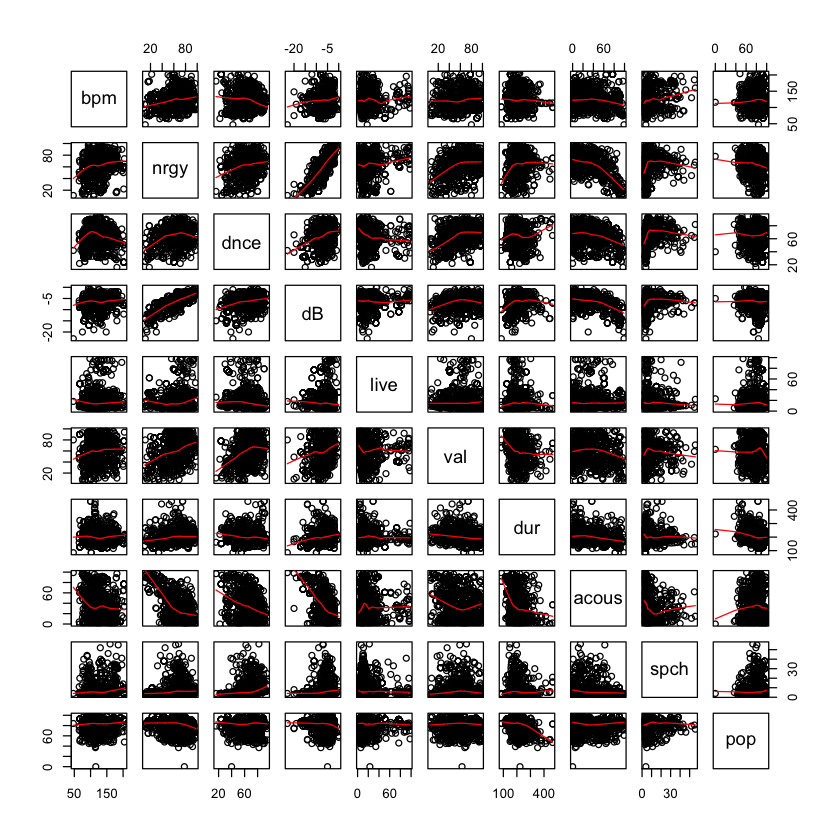

In [8]:
pairs(df[, 7:16], panel = panel.smooth)

Just a note that **Correlation is not causation!**: just because two variables are correlated does not mean that one variable cause another variable to change! 
Once we have identified 2 variables that are correlated, we would like to model this relationship. 


FINALLY, let's build our SLR! 

## 3. Simple Linear Regression 

In [9]:
model1 <- lm(pop ~ nrgy, data=dfnew)
summary(model1)


Call:
lm(formula = pop ~ nrgy, data = dfnew)

Residuals:
    Min      1Q  Median      3Q     Max 
-79.815  -6.884   2.977   8.806  18.978 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 87.88529    1.39163  63.153  < 2e-16 ***
nrgy        -0.10347    0.02155  -4.801 1.82e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.94 on 982 degrees of freedom
Multiple R-squared:  0.02294,	Adjusted R-squared:  0.02194 
F-statistic: 23.05 on 1 and 982 DF,  p-value: 1.821e-06


The two values that we should look at to check a SLR model is P-value  and R-squared. The P-value for the estimated-parameters.  In general, we want the p-value to be <0.05 which is statiscally significant. And the R-squared value is close to 1. In this case, R-squared = 0.023, it means that enery can explain 2.3% of the popularity. This is not good!

$$Pop = 87.88529 -0.10347 \times nrgy$$

In [10]:
model2 <- lm(pop ~ dur, data = dfnew)
summary(model2)


Call:
lm(formula = pop ~ dur, data = dfnew)

Residuals:
    Min      1Q  Median      3Q     Max 
-80.348  -6.565   2.366   9.006  19.108 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 95.107544   1.680802  56.585  < 2e-16 ***
dur         -0.066186   0.007939  -8.337 2.55e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.65 on 982 degrees of freedom
Multiple R-squared:  0.0661,	Adjusted R-squared:  0.06515 
F-statistic: 69.51 on 1 and 982 DF,  p-value: 2.549e-16


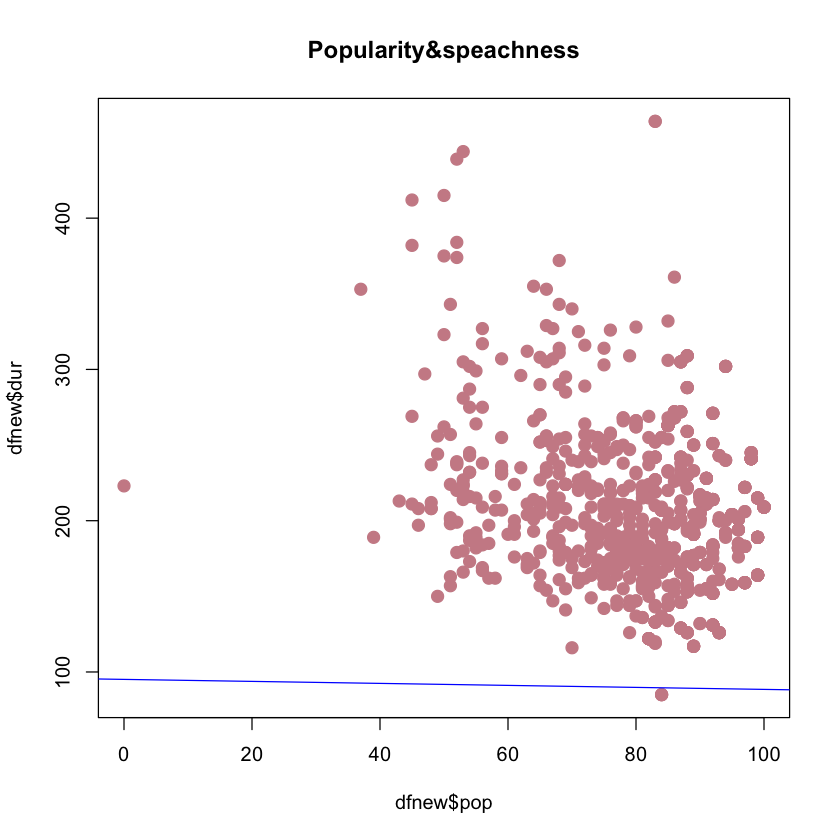

In [11]:
plot(dfnew$pop, dfnew$dur, col='lightpink3', pch=20, cex=2, 
     main="Popularity&speachness" )
abline(model2, col = 'blue')

In [12]:
model3 <- lm(pop ~ spch, data=dfnew)
summary(model3)


Call:
lm(formula = pop ~ spch, data = dfnew)

Residuals:
    Min      1Q  Median      3Q     Max 
-80.894  -6.845   3.235   8.977  18.461 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 80.37786    0.59794 134.424  < 2e-16 ***
spch         0.12896    0.04918   2.622  0.00888 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.05 on 982 degrees of freedom
Multiple R-squared:  0.006952,	Adjusted R-squared:  0.005941 
F-statistic: 6.875 on 1 and 982 DF,  p-value: 0.008876


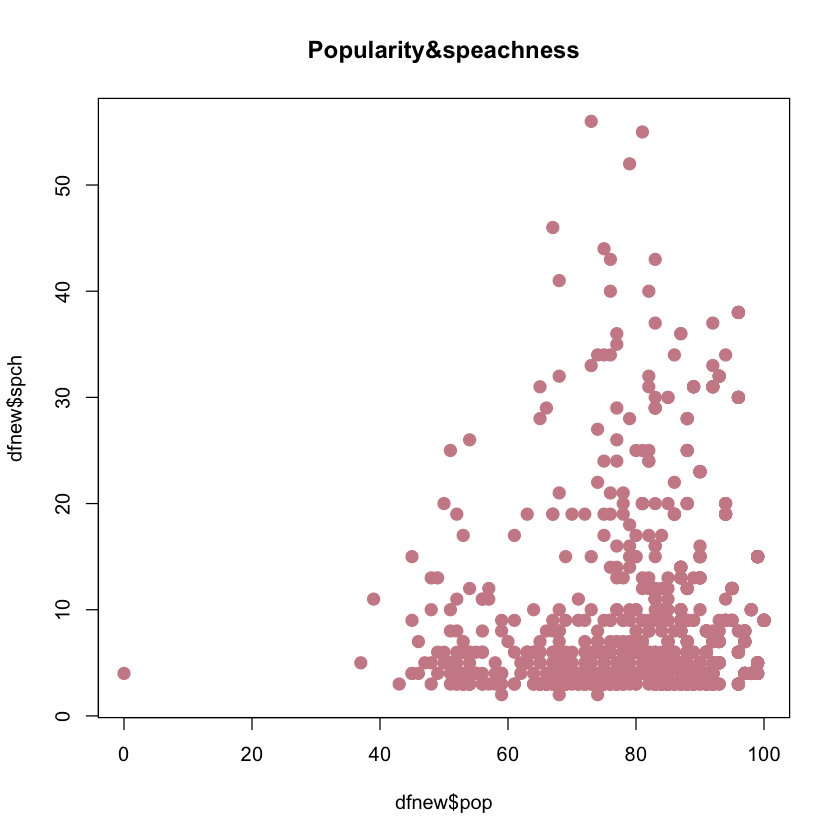

In [13]:
plot(dfnew$pop, dfnew$spch, col='lightpink3', pch=20, cex=2, 
     main="Popularity&speachness" )
abline(model3, col = 'blue')

In [14]:
compare_models <- data.frame( model = c(1, 2, 3),
                        R_square = c(summary(model1)$r.squared,
                                      summary(model2)$r.squared,
                                     summary(model3)$r.squared 
                                     ), 
                                      
                        P_value = c(anova(model1)$'Pr(>F)'[1], #take out the p-values
                                    anova(model2)$'Pr(>F)'[1],
                                    anova(model3)$'Pr(>F)'[1])
                               
                                    ) 
compare_models

model,R_square,P_value
1,0.022937024,1.821271e-06
2,0.066103103,2.549248e-16
3,0.006952327,8.876326e-03


From the table above, we can tell that the model has the bettest effect on the popularity  is **model two** (`Duration.` and `Popularity`), it has very much larger R_quare, $0.066$  values and very small P_value, $2.5e-16$ than that in other models. 

So That's It, it is the basic idea about SL. NExt video I will talk about MLR and Hopefully we can find out a good model to predict the popularity of the song!!!!! see you soon 

## 4. Multiple Linear Regression

In [15]:
model4 = lm(pop ~  nrgy + dur , data=dfnew)
summary(model4)


Call:
lm(formula = pop ~ nrgy + dur, data = dfnew)

Residuals:
    Min      1Q  Median      3Q     Max 
-79.215  -6.947   2.338   9.437  19.844 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 98.68959    1.95825  50.397  < 2e-16 ***
nrgy        -0.07470    0.02128  -3.509 0.000469 ***
dur         -0.06120    0.00802  -7.631 5.51e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.58 on 981 degrees of freedom
Multiple R-squared:  0.07768,	Adjusted R-squared:  0.0758 
F-statistic: 41.31 on 2 and 981 DF,  p-value: < 2.2e-16


In [16]:
model5 = lm(pop ~  nrgy + spch , data=dfnew)
summary(model5)


Call:
lm(formula = pop ~ nrgy + spch, data = dfnew)

Residuals:
    Min      1Q  Median      3Q     Max 
-78.755  -7.069   2.902   9.296  20.010 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 87.19982    1.39659  62.438  < 2e-16 ***
nrgy        -0.11730    0.02177  -5.388  8.9e-08 ***
spch         0.17616    0.04928   3.575 0.000368 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.87 on 981 degrees of freedom
Multiple R-squared:  0.0355,	Adjusted R-squared:  0.03353 
F-statistic: 18.05 on 2 and 981 DF,  p-value: 1.997e-08


In [17]:
model6 = lm(pop ~ nrgy + dur + spch, data=dfnew)
summary(model6)


Call:
lm(formula = pop ~ nrgy + dur + spch, data = dfnew)

Residuals:
    Min      1Q  Median      3Q     Max 
-78.280  -6.896   2.309   9.310  20.066 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 97.838567   1.965684  49.773  < 2e-16 ***
nrgy        -0.087715   0.021547  -4.071 5.06e-05 ***
dur         -0.059857   0.007991  -7.491 1.53e-13 ***
spch         0.157754   0.048016   3.285  0.00105 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.52 on 980 degrees of freedom
Multiple R-squared:  0.08773,	Adjusted R-squared:  0.08494 
F-statistic: 31.41 on 3 and 980 DF,  p-value: < 2.2e-16


# C. Predict  Function

Seems that our model5 has better result to predict the popularity. with Higher R-squared and Adjusted R-squared comparing to model4:

$$popularity = 97.838567  -0.087715  \times nrgy        -0.059857\times dur + 0.157754 \times spch $$

In [18]:
predictFunction <- function(){

    var1 = readline("Enter energy : ") 
    var2 = readline("Enter duration : ") 
    var3 = readline("Enter spch : ") 
# converting each value 
var1 = as.integer(var1)
var2 = as.integer(var2) 
var3 = as.integer(var3)

predict_result  <- predict(model5, data.frame( nrgy = var1, dur = var2,  spch = var3)) 

# print the sum of the 4 number 
#cat("The Popularity of this song is:",  predict_result)
return (cat("The Popularity of this song is:",  predict_result))}




#predict_result  <- predict(model5, data.frame( nrgy = 59, dur = 209,  spch = 9))
#predict_result

In [22]:
#check our predict function
#Dance Monkey, nrgy = 59, dur = 209,  spch = 9, popularity = 100
predictFunction()

Enter energy : 59
Enter duration : 209
Enter spch : 9
The Popularity of this song is: 81.86454

# D. Conclution

R-squared is 0.087 means that 8.7 % the changes of popularity is effected by the increase of  spch, the decrease of nrgy, and the decrease of dur. 

From this report, we can conclude that to have a better rate of popularity of your songs, you may look at the three features: energy,  duration, and speechness. Decreasing the energy and duration,  and increasing the speechness may lead to an increase in songs' popularity - this assumption accurate up to 8.7%.

As we can see when we use the predict function of `model 6` to predict the popularity of Top 1st Song, **Dance Monkey**, it is 81.86 which is 18.14%. lower comparing to its real value, 100. 